# Titanic Survival Prediction using Logistic Regression

## Introduction
  
 **Logistic Regression** is a statistical method used for **binary classification problems**, where the target variable has two possible outcomes (e.g., Survived = 1, Not Survived = 0). Unlike linear regression, which predicts continuous values, logistic regression predicts **probabilities** that a given input belongs to a particular class and hence is a classification technique.

The model uses the **sigmoid function** to map any real-valued number into a range between 0 and 1:

A probability threshold (commonly 0.5) is then applied to decide the final class:  

\{Predicted Class} =
\begin{cases}
1 & \text{if } \sigma(z) \geq 0.5 \\
0 & \text{if } \sigma(z) < 0.5
\end{cases}
\

We will use **Logistic Regression**, a widely-used algorithm for binary classification, due to its simplicity and interpretability. The project includes:  

1. **Exploratory Data Analysis (EDA)** – Understanding the dataset, identifying missing values, and visualizing patterns.  
2. **Data Preprocessing** – Handling missing values, encoding categorical features, and scaling numerical features.  
3. **Model Building** – Training a logistic regression model on the processed data.  
4. **Model Evaluation** – Assessing performance using accuracy, confusion matrix, classification report,and ROC-AUC.  

 Predicting the survival of passengers on the Titanic has become a classic machine learning problem, often used to demonstrate binary classification techniques. In this project, we aim to **predict whether a passenger survived or not** based on features such as age, gender, passenger class, and other relevant attributes.  

##Importing Libraries
• Numpy – It provides a fast numerical array structure and operating functions.

• pandas – It provides tools for data storage, manipulation and analysis tasks.

• Scikit-Learn – The required machine learning library in Python.

• Matplotlib – It is the basic plotting library in Python. It provides tools for making plots.

• Seaborn - Used for advanced and attractive statistical data visualization.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Uploading and loading the dataset

In [3]:
from google.colab import files
uploaded = files.upload()  # This will open a file upload dialog

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [4]:
df = pd.read_csv('Titanic-Dataset.csv') #reading the CSV file into pandas dataframe

#Exploratory Data Analysis

In [5]:
df.shape #view dimensions of dataset

(891, 12)

We can see that there are 891 instances and 12 variables in the dataset.

In [6]:
df.head() #Display first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info() #Check column names, non-null counts, and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Categorical variables have datatype object. This summarizes that we have to use encoding on the 5 object variables.

In [8]:
# Get basic statistics for numerical columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


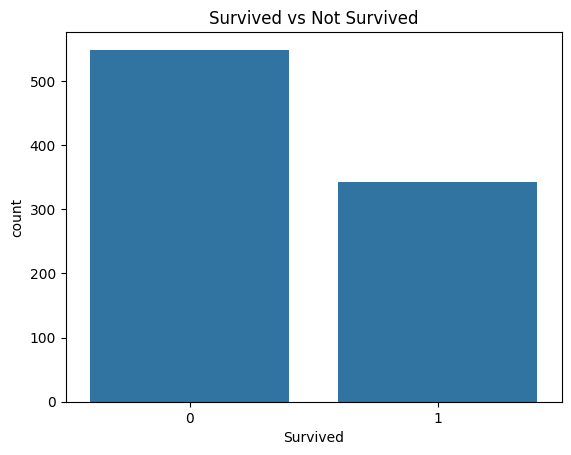

In [9]:
# Count of survivors vs non-survivors
sns.countplot(data=df, x='Survived')
plt.title('Survived vs Not Survived')
plt.show()

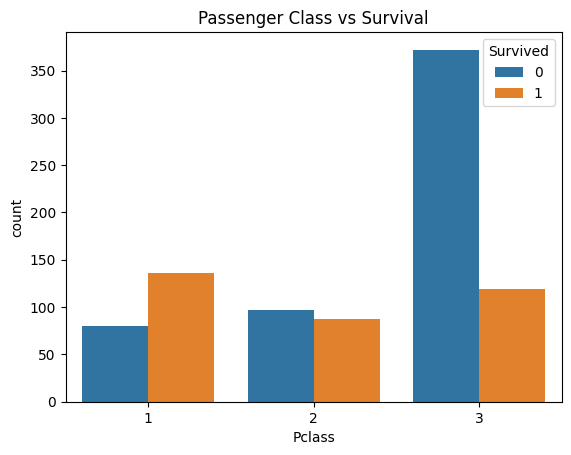

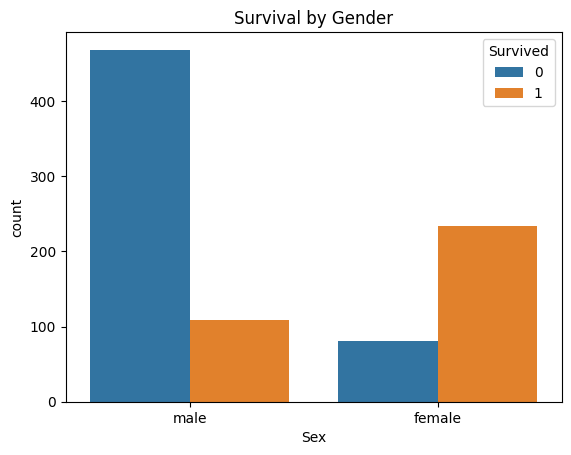

In [10]:
# Count of passengers by Pclass and Survival
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Passenger Class vs Survival')
plt.show()

# Survival rate by Sex
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.show()


##Data Preprcessing & Feature Engineering
Before training the model, we need to **prepare the dataset** by dropping irrelevant columns, handling missing values, encoding categorical variables, and scaling features.



In [11]:
#Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
#Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)        # Fill missing Age with median
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Fill missing Embarked with mode

/tmp/ipython-input-1952567429.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)        # Fill missing Age with median
/tmp/ipython-input-1952567429.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
#Drop irrelevant columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [15]:
df.shape #after dropping duplicates and missing values

(891, 8)

In [16]:
# 4. Encode categorical variables (only 2 remain as we dropped irrelevant columns)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

##Outlier check

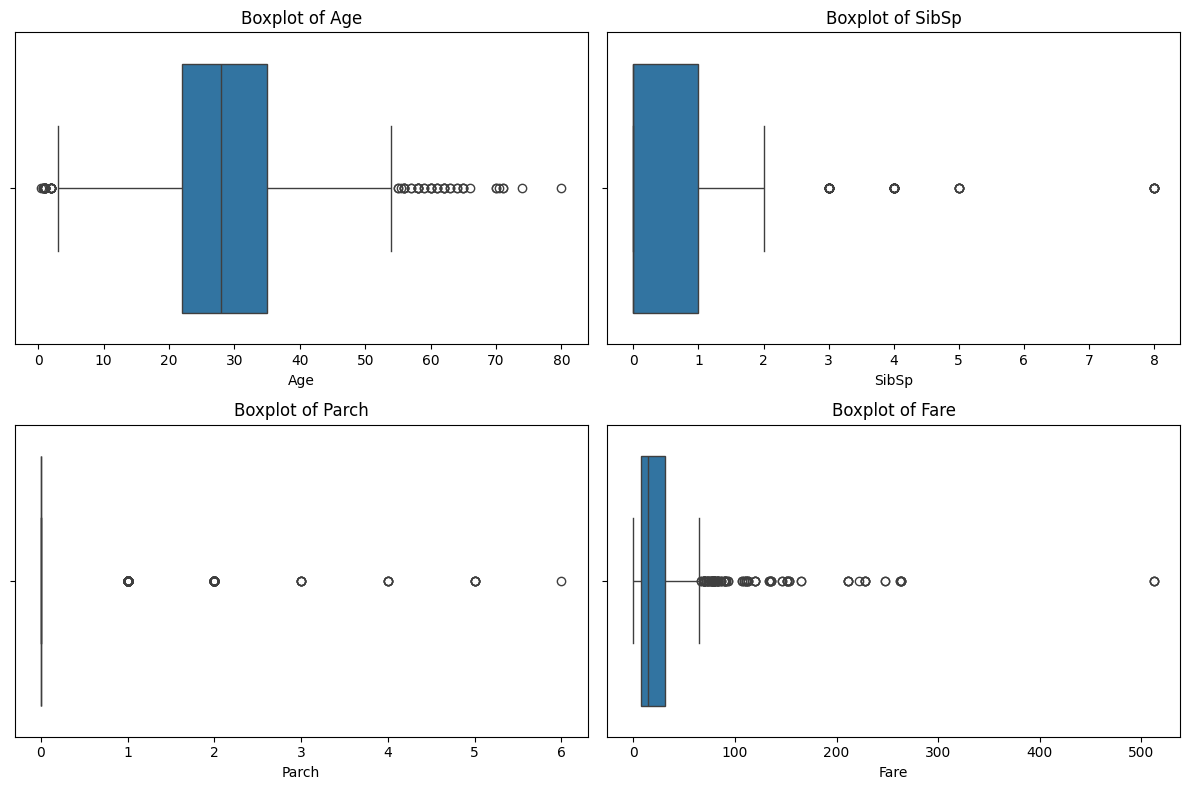

In [17]:
# Numeric columns
numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare']

# Boxplots for each numeric feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


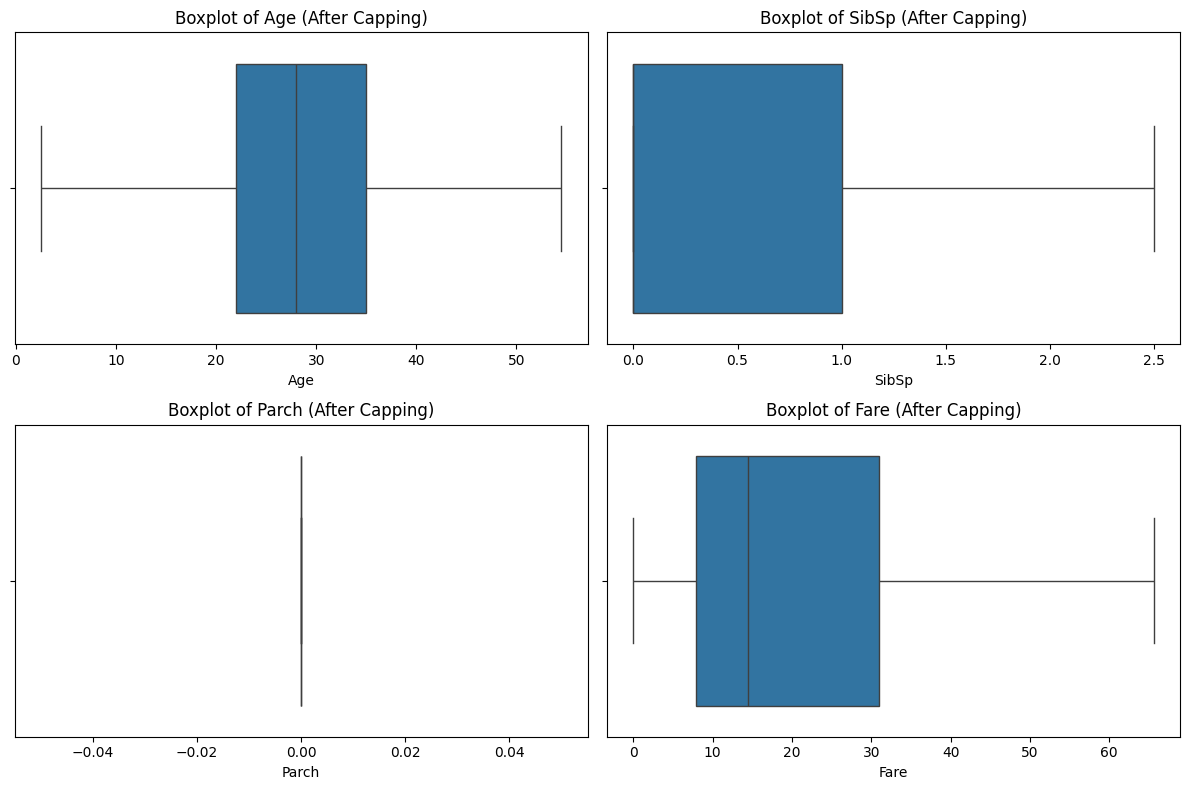

Dataset shape after capping: (891, 9)


In [18]:
# Numeric columns to check
numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare']
#Function to cap outliers using IQR
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].apply(lambda x: upper if x > upper else (lower if x < lower else x))
    return df

#Apply capping to numeric columns
for col in numeric_cols:
    df = cap_outliers(df, col)

#Visualize boxplots after capping
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} (After Capping)')
plt.tight_layout()
plt.show()

#Check dataset shape after capping
print("Dataset shape after capping:", df.shape)


So here we retained shape as we capped outlier values instead of removing them for better accuracy and generalization

##Correlation Plot

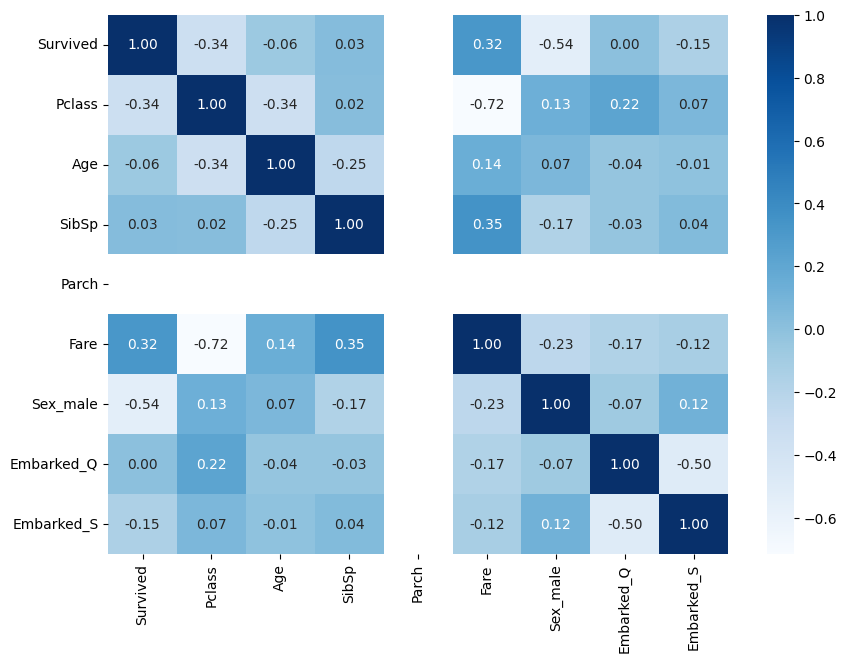

In [19]:

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

##Test Train Split

In [20]:
# Define features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

In [21]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Feature scaling using StandardScaler

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Print shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 8)
X_test shape: (179, 8)
y_train shape: (712,)
y_test shape: (179,)


#Logistic Regression Model
We'll train a **logistic regression model** on the preprocessed Titanic dataset and evaluate its performance.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [24]:
logreg = LogisticRegression(random_state=42) #Setting random_state ensures that the same random numbers are generated every time, so you get the same results each time you run your code.
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

##Predict Results

In [25]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0])

**predict_proba** method gives the probabilities for the target variable(0 and 1) in this case, in array form.

0 is for probability of no survival and 1 is for probability of survival.

In [26]:
logreg.predict_proba(X_test)[:,1] #probability of getting output as 1 - survival

array([0.05913421, 0.05029097, 0.14333507, 0.02765442, 0.66036966,
       0.4100868 , 0.72326269, 0.30280031, 0.36629611, 0.14514381,
       0.15955144, 0.07478388, 0.56231259, 0.23843811, 0.43650909,
       0.17631111, 0.37925871, 0.0841165 , 0.12372815, 0.73900112,
       0.0841165 , 0.77407465, 0.07814903, 0.42758627, 0.08093708,
       0.96808292, 0.15955144, 0.26321386, 0.11298154, 0.12485486,
       0.06736269, 0.9449645 , 0.09127556, 0.09346533, 0.13023322,
       0.14779671, 0.18430183, 0.55660369, 0.15955144, 0.84309245,
       0.24284084, 0.97192771, 0.10722831, 0.84468541, 0.74841513,
       0.10824393, 0.08537378, 0.35152078, 0.73254718, 0.87248893,
       0.93601661, 0.55278027, 0.71842797, 0.21105549, 0.58227077,
       0.09049492, 0.06553326, 0.39256691, 0.61956855, 0.40286043,
       0.57264097, 0.7080624 , 0.12894903, 0.1307935 , 0.42732871,
       0.50102309, 0.94746412, 0.07098374, 0.24051409, 0.23895526,
       0.81190401, 0.11628397, 0.71870107, 0.96655015, 0.17845

##Check accuracy score

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

Accuracy: 0.7877



##Compare the train-set and test-set accuracy

In [28]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,

In [29]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7935


In [30]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.7935
Test set score: 0.7877


- The training and test accuracies are very close (~0.6% difference), indicating that the model **generalizes well** and is **not overfitting**.  
- The model shows **slight underfitting**, as the accuracy is moderate. This suggests there is room for improvement, possibly through **feature engineering** or **hyperparameter tuning**.

Overall, the model provides a good baseline for predicting Titanic survival.

###Fitting the values with different values of C (by default it is C=1)

In [31]:
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [32]:
print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.7921
Test set score: 0.7877


C=100 → less regularization, allows the model to fit training data more closely.

In [33]:
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [34]:
print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.7851
Test set score: 0.7598


Result accuracy decreased for a more regularized model for c=0.01

###Compare model accuracy with null accuracy

In [35]:
y_test.value_counts()

,count
Survived,
0,110
1,69


We can see that the occurences of most frequent class is 110. So, we can calculate null accuracy by dividing 110 by total number of occurences.

In [36]:
#check null accuracy score
null_accuracy = (110/(110+69))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6145


We can see that our model accuracy score is 0.7877 but null accuracy score is 0.6145. So, we can conclude that our Logistic Regression model is doing a very good job in predicting the class labels.

##Confusion Matrix
A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

In [37]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[96 14]
 [24 45]]

True Positives(TP) =  96

True Negatives(TN) =  45

False Positives(FP) =  14

False Negatives(FN) =  24


The confusion matrix shows 96 + 45 = 141 correct predictions and 14 + 24 = 38 incorrect predictions.

<Axes: >

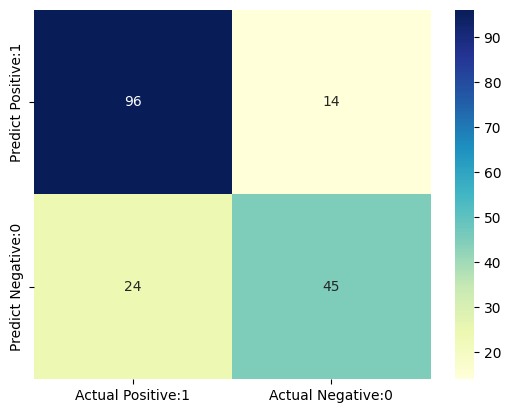

In [40]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

##Classification Report
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model.

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       110
           1       0.76      0.65      0.70        69

    accuracy                           0.79       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



###Classification Accuracy & Error

In [42]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [43]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7877


In [44]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2123


###Precision
Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes.

In [45]:
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8727


###Recall/True Positive Rate(TPR)
Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. Recall is also called Sensitivity.

In [46]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8000


###False Positive Rate (TPR)

In [47]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2373


###f-1 score
f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0

In [49]:
f1_score = (2*precision*recall)/(precision+recall)
print('f-1 score: {0:0.4f}'.format(f1_score))

f-1 score: 0.8348


###ROC-AUC
Receiver Operating Characteristic Curve (ROC) is a plot which shows the performance of a classification model by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various classification threshold levels.

ROC-AUC (Area Under Curve) is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

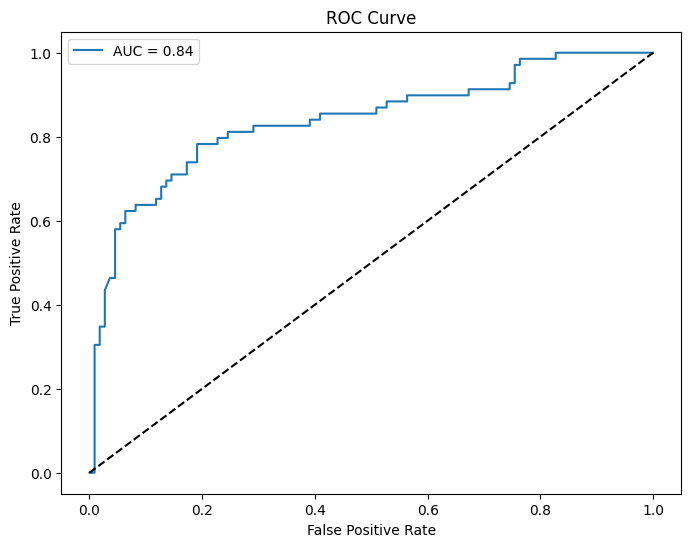

ROC AUC Score: 0.8390


In [53]:
from sklearn.metrics import roc_auc_score, roc_curve
# ROC Curve & AUC
y_prob = logreg100.predict_proba(X_test)[:, 1] # probabilities for ROC
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f"ROC AUC Score: {roc_auc:.4f}")

##Hyperparameter Optimization using GridSearch CV

In [57]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']},
              {'C':[0.01, 0.1, 1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver(s

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid=[{'penalty': ['l1', 'l2']},
                         {'C': [0.01, 0.1, 1, 10, 100, 1000]}],
             scoring='accuracy')

In [58]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8034


Parameters that give the best results : 

 {'C': 0.01}


Estimator that was chosen by the search : 

 LogisticRegression(C=0.01, random_state=42)


In [59]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.7765


Our original model test accuracy is 0.7877 while GridSearch CV accuracy is 0.8034.

We can see that GridSearch CV improve the performance for this particular model.